In [2]:
import os
import sys
import csv
import json

sys.path.insert(0, os.path.abspath('..') + '/src')

import pandas as pd
import matplotlib.pyplot as plt

## Difficulty level of medical questions

To build a fair benchmark, we need to include questions with various difficulty levels. Based on the difficulty criteria for medical tasks introduced in [AlpaCare](https://arxiv.org/abs/2310.14558), we slightly changed the criteria for medical question difficulty level annotation. Then we annotated all medical questions in our benchmark using GPT-4 and this criteria. Here's how to run this script:

```
python llm_annotation.py \
        --input-path ../data/lavita_eval_clustered_04-30-2024.csv \
        --output-path ../data \
        --text-columns corrected_input_text \
        --prompt-template ../prompt/difficulty_level_annotation_lavita.txt \
        --annotator-models openai_gpt-4-0125-preview \
        --log_steps 1 \
```

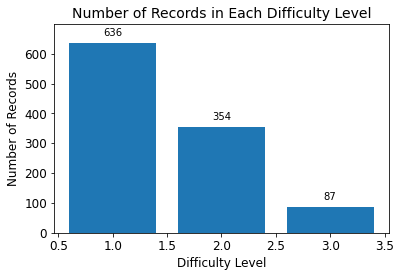

In [3]:
df = pd.read_csv('../data/llm_ann-01-05-2024_21-57-18.csv')

df['difficulty'] = df['openai_gpt4_step2'].apply(lambda x: json.loads(x)['difficulty'])

counts = df['difficulty'].value_counts().sort_index()

# Plot the results
fig, ax = plt.subplots()

fig.subplots_adjust(top=0.85)

# Set font sizes
title_fontsize = 14
label_fontsize = 12
tick_fontsize = 12
annotation_fontsize = 10

bars = ax.bar(counts.index, counts.values)
ax.set_title('Number of Records in Each Difficulty Level', fontsize=title_fontsize)
ax.set_xlabel('Difficulty Level', fontsize=label_fontsize)
ax.set_ylabel('Number of Records', fontsize=label_fontsize)
ax.tick_params(axis='both', labelsize=tick_fontsize)

# Add text annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=annotation_fontsize)
    
y_limit = max(height + max(counts.values) * 0.1 for height in counts)
ax.set_ylim(0, y_limit)

plt.show()